## 텍스트 분류 - 뉴스
---
 - scikit-learn의 dataset인 20대 뉴스

## [1] 데이터 준비
---

In [5]:
from sklearn.datasets import fetch_20newsgroups

x_train, y_train=fetch_20newsgroups(return_X_y=True, remove=('headers', 'footers'))

In [109]:
import numpy as np
x_train[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [110]:
type(y_train)

numpy.ndarray

In [111]:
from keras.preprocessing.text import text_to_word_sequence, Tokenizer

In [112]:
tokenizer=Tokenizer(oov_token=1, num_words=500)

In [113]:
tokenizer.fit_on_texts(x_train)

In [114]:
tokenizer.word_index

{1: 1,
 'the': 2,
 'to': 3,
 "'ax": 4,
 'of': 5,
 'a': 6,
 'and': 7,
 'in': 8,
 'i': 9,
 'is': 10,
 'that': 11,
 'it': 12,
 'for': 13,
 'you': 14,
 'this': 15,
 'on': 16,
 'be': 17,
 'are': 18,
 'have': 19,
 'not': 20,
 'with': 21,
 'as': 22,
 'or': 23,
 'if': 24,
 'but': 25,
 'was': 26,
 '1': 27,
 'they': 28,
 'from': 29,
 'by': 30,
 'at': 31,
 'edu': 32,
 'an': 33,
 '2': 34,
 'can': 35,
 '0': 36,
 '3': 37,
 'will': 38,
 'what': 39,
 'all': 40,
 'would': 41,
 'my': 42,
 'there': 43,
 'one': 44,
 'do': 45,
 'x': 46,
 'writes': 47,
 "'": 48,
 'about': 49,
 'm': 50,
 'we': 51,
 'so': 52,
 'he': 53,
 'has': 54,
 'your': 55,
 'no': 56,
 'article': 57,
 'any': 58,
 'some': 59,
 'me': 60,
 'who': 61,
 'which': 62,
 'out': 63,
 'q': 64,
 'com': 65,
 'people': 66,
 'more': 67,
 'like': 68,
 'their': 69,
 'when': 70,
 'just': 71,
 "don't": 72,
 '4': 73,
 'were': 74,
 '5': 75,
 'up': 76,
 'other': 77,
 'know': 78,
 'how': 79,
 'get': 80,
 'max': 81,
 'only': 82,
 'w': 83,
 'them': 84,
 '7': 85,


In [115]:
x_count=tokenizer.word_counts

In [133]:
x_count=dict(x_count)

In [153]:
sorted(x_count.values(), reverse=True)

336

In [117]:
x_count

OrderedDict([('i', 42081),
             ('was', 12558),
             ('wondering', 304),
             ('if', 12897),
             ('anyone', 2313),
             ('out', 5828),
             ('there', 8481),
             ('could', 3353),
             ('enlighten', 25),
             ('me', 6210),
             ('on', 18860),
             ('this', 19138),
             ('car', 1181),
             ('saw', 531),
             ('the', 138169),
             ('other', 4954),
             ('day', 1275),
             ('it', 28340),
             ('a', 59762),
             ('2', 9224),
             ('door', 254),
             ('sports', 152),
             ('looked', 337),
             ('to', 69232),
             ('be', 18319),
             ('from', 10597),
             ('late', 285),
             ('60s', 17),
             ('early', 438),
             ('70s', 14),
             ('called', 1113),
             ('bricklin', 4),
             ('doors', 85),
             ('were', 5172),
             ('really'

In [118]:
seq_voca=tokenizer.texts_to_sequences(x_train)

In [119]:
seq_voca[0]

[9,
 26,
 1,
 24,
 153,
 63,
 43,
 107,
 1,
 60,
 16,
 15,
 271,
 9,
 1,
 2,
 77,
 254,
 12,
 26,
 6,
 34,
 1,
 1,
 271,
 1,
 3,
 17,
 29,
 2,
 1,
 1,
 1,
 1,
 12,
 26,
 288,
 6,
 1,
 2,
 1,
 74,
 166,
 419,
 8,
 1,
 2,
 1,
 1,
 26,
 1,
 29,
 2,
 1,
 5,
 2,
 1,
 15,
 10,
 40,
 9,
 78,
 24,
 153,
 35,
 1,
 6,
 1,
 251,
 1,
 1,
 182,
 5,
 1,
 139,
 15,
 271,
 10,
 208,
 1,
 23,
 1,
 380,
 14,
 19,
 16,
 15,
 1,
 352,
 271,
 177,
 116,
 223]

In [120]:
# 데이터별 길이 결정
len_list=[len(x) for x in seq_voca]

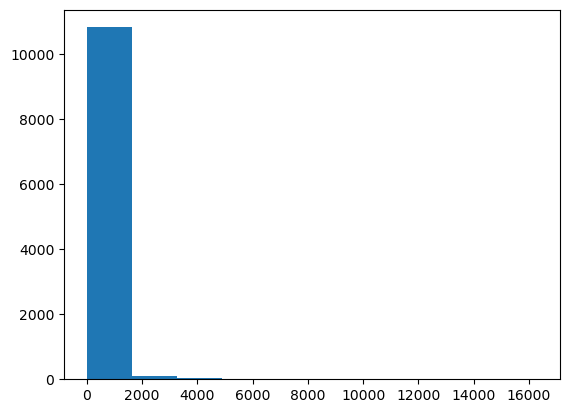

In [121]:
import matplotlib.pyplot as plt
plt.hist(len_list[300:])
#plt.xlim(0,10000)
plt.show()

In [122]:
len_array=np.array(len_list)

In [123]:
len_array.max(), len_array.min(), len_array.mean(), np.median(len_array)

(16306, 0, 274.08962347534026, 139.0)

In [124]:
# [2-2] 데이터별 길이 변경
from keras.utils import pad_sequences

encding_x_train=pad_sequences(seq_voca, maxlen=275)
encding_x_train

array([[  0,   0,   0, ..., 177, 116, 223],
       [  0,   0,   0, ...,  15,   1, 203],
       [  2,   1,  13, ...,   1,   1,   1],
       ...,
       [  0,   0,   0, ...,   6,   1, 228],
       [  0,   0,   0, ...,   1, 113,   1],
       [  0,   0,   0, ..., 180,  42,   1]])

In [127]:
encding_x_train.shape

(11314, 275)

In [125]:
# 원핫인코딩(One-Hot-Encoding)

from keras.utils import to_categorical
train_oh=to_categorical(encding_x_train)

MemoryError: Unable to allocate 5.80 GiB for an array with shape (3111350, 500) and data type float32

In [126]:
encding_x_train.shape

(11314, 275)

In [ ]:
# 케라스 불용어 제거
# for idx in range(len(newsData20)):
    # news=text_to_word_sequence(newsData20[idx])
    # _clear=[]
    # for n in news:
    #     if n not in stopwords:
    #         _clear.append(n)
    # newsData20[idx]=' '.join(_clear)

In [ ]:
# 토큰으로 쪼개고 불용어 제거
# Tokenizer객체 생성
# num_words의 기준: 단어 빈도수 확인하고 설정